# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import bokeh


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = os.path.join("..","output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Loop through the cities list and add each city to the URL in the request
#loop through one city at a time and make sure the code works

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Get latitude and temperature for cities
cities = cities[0:200]
# set up lists to hold reponse info
# we need more data than latitude and temp for the hw 
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
cities_list = []
counter = 0
set_list = 1
t = 10
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response["dt"])
        cities_list.append(city)
        print(f'Processing Record {counter} of Set {set_list} | {city}')
    except KeyError:
        print("This city does not exist")
        pass
    
    if counter >= 50:
        time.sleep(t)
        counter = 0
        set_list += 1
        print(f'The program paused for {t} seconds')

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")


Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | omaruru
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | pangnirtung
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | high level
This city does not exist
Processing Record 10 of Set 1 | igarka
Processing Record 11 of Set 1 | kavieng
This city does not exist
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | soyaux
Processing Record 15 of Set 1 | gusau
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | kapaa
This city does not exist
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | atasu
This city does not exist
Processing Record 23 of Set 1 | longyearbyen
Processing Record 24 of Set 1 | beloha
Processing Record 25 of Set 1 | shache
Processing Record 26 of Set 1 | bluff
This city doe

In [7]:
print(len(cities_list), len(temp), len(humidity),len(cloudiness), len(lat), len(date), len(wind_speed))

178 178 178 178 178 178 178


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#df.to_csv(output_file)

In [9]:
import datetime
city_data = pd.DataFrame({"City Name":cities_list,"Date (UTC)":date,"Latitude":lat,"Temperature (F)":temp,"Humidity (%)":humidity,"Cloudiness (%)":cloudiness,"Wind Speed (MPH)":wind_speed})
city_data["City Name"] = [city.title() for city in city_data["City Name"]]
city_data["Date (UTC)"] = [datetime.datetime.utcfromtimestamp(date) for date in city_data["Date (UTC)"]]
city_data.to_csv(output_file)
city_data

,City Name,Date (UTC),Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Hithadhoo,2020-04-08 16:27:11,-0.60,85.69,66,58,7.83
1,Omaruru,2020-04-08 16:29:39,-21.43,86.90,16,21,7.90
2,Busselton,2020-04-08 16:29:39,-33.65,62.01,49,0,7.34
3,Bilma,2020-04-08 16:29:39,18.69,100.00,8,21,5.66
4,Saint-Philippe,2020-04-08 16:29:39,-21.36,72.34,83,14,4.70
...,...,...,...,...,...,...,...
173,San Antonio,2020-04-08 16:26:09,29.42,80.06,83,20,6.93
174,Todos Santos,2020-04-08 16:30:26,23.45,73.06,53,75,9.69
175,Norman Wells,2020-04-08 16:30:26,65.28,3.20,71,20,8.05
176,Bloemhof,2020-04-08 16:30:26,-27.65,64.36,19,0,5.28


In [10]:
# import time
# seconds = time.time()
# print("Seconds since epoch =", seconds)
# local_time = time.ctime(seconds)
# print("Local time:", local_time)
# time.struct_time?

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

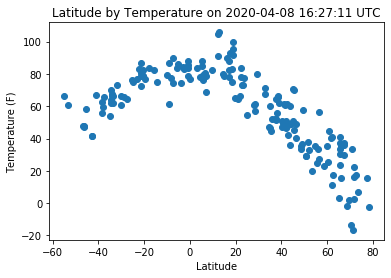

In [11]:
city_lat = city_data["Latitude"]
city_temp = city_data["Temperature (F)"]
city_date = city_data["Date (UTC)"]

plt.scatter(city_lat,city_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude by Temperature on {city_date[0]} UTC")
plt.savefig("../output/Lat_Temp_fig_png")
plt.show()

In [12]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Humidity Plot

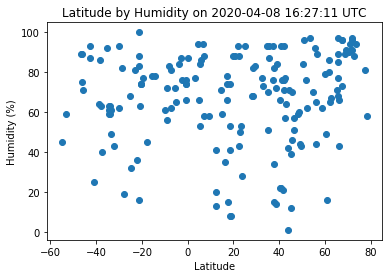

In [13]:
city_humidity = city_data["Humidity (%)"]

plt.scatter(city_lat,city_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude by Humidity on {city_date[0]} UTC")
plt.savefig("../output/Lat_Hum_fig_png")
plt.show()

In [14]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Cloudiness Plot

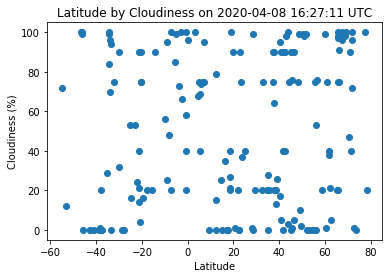

In [15]:
city_cloudiness = city_data["Cloudiness (%)"]

plt.scatter(city_lat,city_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude by Cloudiness on {city_date[0]} UTC")
plt.savefig("../output/Lat_Cloud_fig_png")
plt.show()

In [16]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Wind Speed Plot

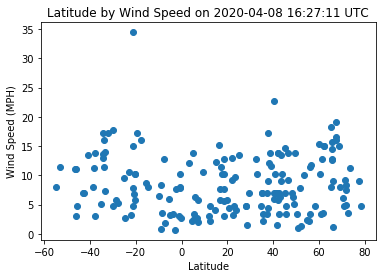

In [17]:
city_windspeed = city_data["Wind Speed (MPH)"]

plt.scatter(city_lat,city_windspeed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Latitude by Wind Speed on {city_date[0]} UTC")
plt.savefig("../output/Lat_Wind_fig_png")
plt.show()

In [18]:
# After each plot add a sentence or too explaining what the code is and analyzing.

## Linear Regression

In [29]:
plt.annotate?

In [69]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x_axis = x_values.sum()
    y_axis = y_values.sum()
    x_axis_avg = x_axis / len(x_values)
    y_axis_avg = y_axis / len(y_values)
    plt.annotate(line_eq,(0,1),xycoords='data',fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
#     plt.xlim(0,len(x_values))
#     plt.ylim(0,len(y_values))
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [70]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemp = city_data.loc[city_data["Latitude"]>=0,:]
Southern_hemp = city_data.loc[city_data["Latitude"]<0,:]

#Creating series for variables in the northern hemisphere
Northern_city_lat = Northern_hemp["Latitude"]
Northern_city_temp = Northern_hemp["Temperature (F)"]
Northern_city_hum = Northern_hemp["Humidity (%)"]
Northern_city_cloud = Northern_hemp["Cloudiness (%)"]
Northern_city_wind = Northern_hemp["Wind Speed (MPH)"]

#Creating series for variables in the southern hemisphere
Southern_city_lat = Southern_hemp["Latitude"]
Southern_city_temp = Southern_hemp["Temperature (F)"]
Southern_city_hum = Southern_hemp["Humidity (%)"]
Southern_city_cloud = Southern_hemp["Cloudiness (%)"]
Southern_city_wind = Southern_hemp["Wind Speed (MPH)"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8025406867015145


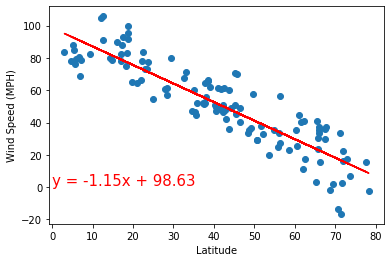

In [71]:
linearregression(Northern_city_lat,Northern_city_temp,"Latitude","Wind Speed (MPH)")

In [72]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6286098026860808


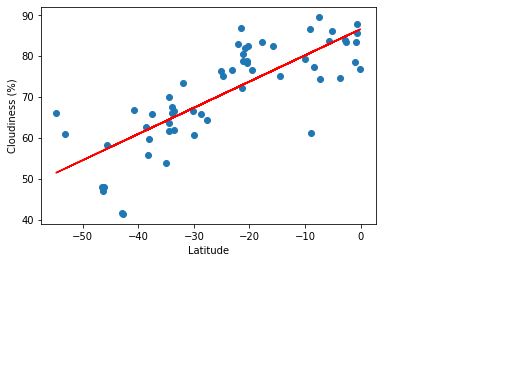

In [73]:
linearregression(Southern_city_lat,Southern_city_temp,"Latitude", "Cloudiness (%)")

In [74]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05902792853377713


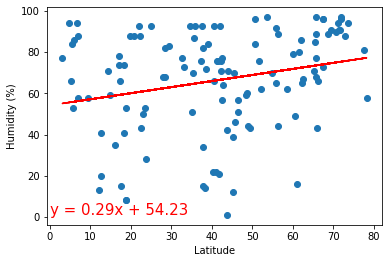

In [75]:
linearregression(Northern_city_lat,Northern_city_hum,"Latitude","Humidity (%)")

In [76]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025068940259273264


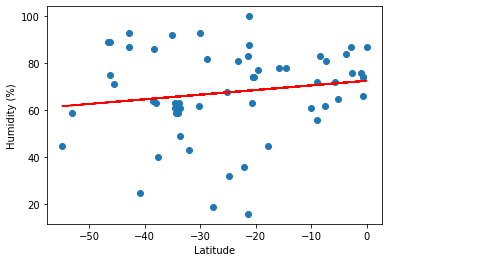

In [77]:
linearregression(Southern_city_lat,Southern_city_hum,"Latitude","Humidity (%)")

In [78]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03462301117767197


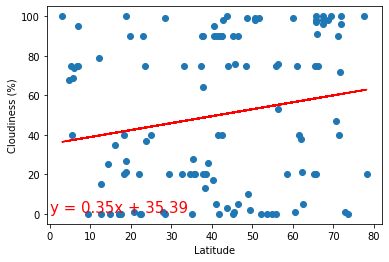

In [79]:
linearregression(Northern_city_lat,Northern_city_cloud,"Latitude","Cloudiness (%)")

In [80]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04912889574033264


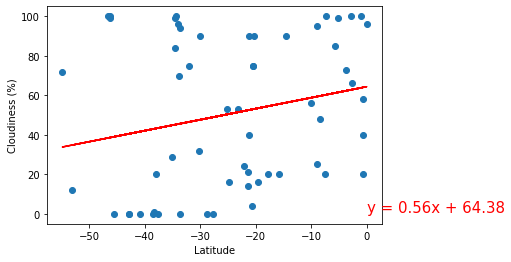

In [81]:
linearregression(Southern_city_lat,Southern_city_cloud,"Latitude","Cloudiness (%)")

In [82]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04561421039520498


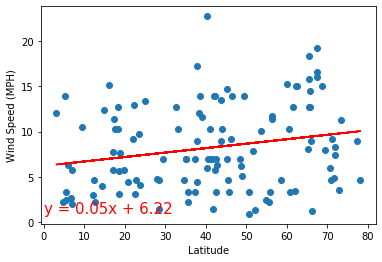

In [83]:
linearregression(Northern_city_lat,Northern_city_wind,"Latitude","Wind Speed (MPH)")

In [84]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05998719804714394


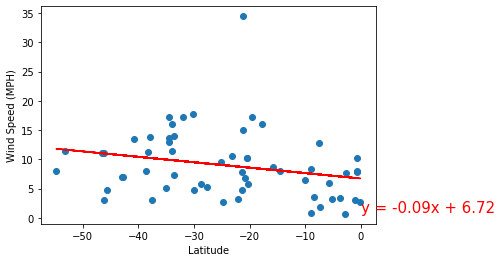

In [85]:
linearregression(Southern_city_lat,Southern_city_wind,"Latitude","Wind Speed (MPH)")

In [86]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.